In [2]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Load your data (replace with your actual file path):
file_path = '/content/datagroup1.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)



# 2. Create treatment and post-treatment variables:
data['treatment_group'] = (data['Name'] == 'Anseba').astype(int) # 1 for Anseba, 0 for Gash Barka
data['post_treatment'] = (data['Year'] >= 2016).astype(int)  # 1 for years 2016 and later, 0 for before

# 3. Run the DiD regression:
model = smf.ols('Value ~ treatment_group * post_treatment', data=data).fit()

# 4. Print the results:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     13.21
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           3.80e-05
Time:                        10:40:33   Log-Likelihood:                -84.450
No. Observations:                  26   AIC:                             176.9
Df Residuals:                      22   BIC:                             181.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

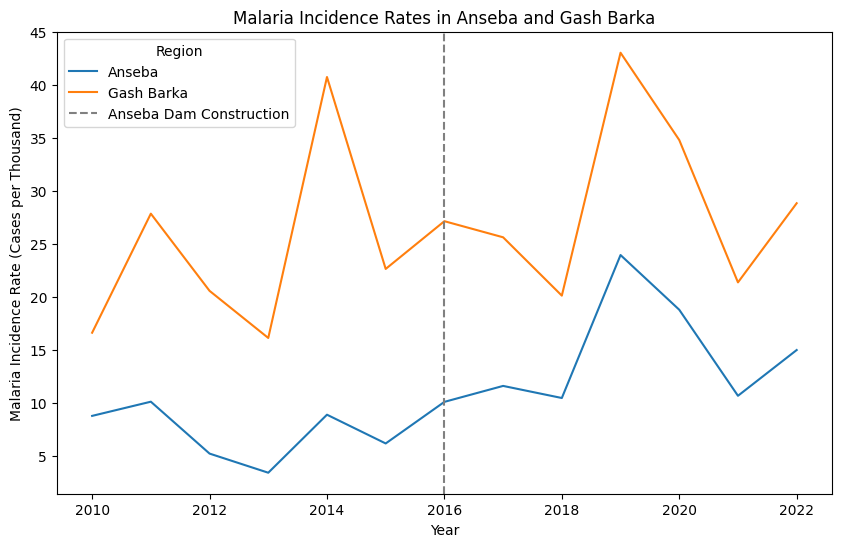

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据 (假设您的数据存储在名为 'DiD group1.csv' 的文件中)
data = pd.read_csv('/content/datagroup1.csv')

# 使用 seaborn 绘制折线图
plt.figure(figsize=(10, 6))  # 设置图形大小
sns.lineplot(x='Year', y='Value', hue='Name',data=data)
plt.title('Malaria Incidence Rates in Anseba and Gash Barka')  # 设置标题
plt.xlabel('Year')  # 设置 x 轴标签
plt.ylabel('Malaria Incidence Rate (Cases per Thousand)')  # 设置 y 轴标签
plt.axvline(2016, color='gray', linestyle='--', label='Anseba Dam Construction')
plt.legend(title='Region')  # 显示图例
plt.savefig('linechart40189.png')
plt.show()  # 显示图形

In [4]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

# 读取数据
df_s = pd.read_csv('/content/datagroup1.csv')


df_s['date'] = pd.to_datetime(df_s['Year'], format='%Y')

models = []
names = []

for window in range(1, 6):
    did = df_s[(df_s['date'] >= pd.to_datetime(str(2016 - window) + '-01-01')) & (df_s['date'] <= pd.to_datetime(str(2016 + window) + '-01-01')) & df_s['Name'].isin(['Anseba', 'Gash Barka'])]
    did['post'] = np.where(did['date'] >= pd.to_datetime('2016-01-01'), 1, 0)
    did['treatment'] = np.where(did['Name'] == 'Anseba', 1, 0)  # 将 'Anseba' 设置为处理组
    did['post_treatment'] = did['post'] * did['treatment']
    did_model = ols('Value ~  post + treatment + post_treatment', did).fit()  # 使用 'incidence' 作为结果变量
    models.append(did_model)
    names.append('± ' + str(window) + ' Year')

table = summary_col(
    models,
    stars=True,
    float_format='%0.3f',
    model_names=names,
    info_dict={"N": lambda x: "{0:d}".format(int(x.nobs))}
)

print(table)

<ipython-input-4-352aea6dd6eb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['post'] = np.where(did['date'] >= pd.to_datetime('2016-01-01'), 1, 0)
<ipython-input-4-352aea6dd6eb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['treatment'] = np.where(did['Name'] == 'Anseba', 1, 0)  # 将 'Anseba' 设置为处理组
<ipython-input-4-352aea6dd6eb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave


                ± 1 Year   ± 2 Year   ± 3 Year  ± 4 Year   ± 5 Year 
--------------------------------------------------------------------
Intercept      22.650***  31.710***  26.517*** 25.033***  25.600*** 
               (1.070)    (4.046)    (5.050)   (3.867)    (3.228)   
post           3.746      -7.404     2.479     5.128      3.098     
               (1.311)    (5.224)    (6.680)   (5.188)    (4.370)   
treatment      -16.481*** -24.183*** -20.364** -19.115*** -18.843***
               (1.513)    (5.722)    (7.141)   (5.469)    (4.565)   
post_treatment 0.934      10.597     5.398     3.937      4.410     
               (1.853)    (7.387)    (9.447)   (7.337)    (6.181)   
R-squared      0.994      0.816      0.603     0.646      0.640     
R-squared Adj. 0.986      0.724      0.484     0.571      0.580     
N              6          10         14        18         22        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [5]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Load your data (replace with your actual file path):
file_path = '/content/datagroup2.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Assuming your data has the following columns (or similar):
# - 'location': The region (Anseba or Gash Barka)
# - 'year': Year of observation
# - 'malaria_incidence': Malaria incidence rate


# 2. Create treatment and post-treatment variables:
data['treatment_group'] = (data['Name'] == 'Amhara').astype(int) # 1 for Anseba, 0 for Gash Barka
data['post_treatment'] = (data['Year'] >= 2016).astype(int)  # 1 for years 2016 and later, 0 for before

# 3. Run the DiD regression:
model = smf.ols('Value ~ treatment_group * post_treatment', data=data).fit()

# 4. Print the results:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     12.00
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           7.32e-05
Time:                        12:03:04   Log-Likelihood:                -141.70
No. Observations:                  26   AIC:                             291.4
Df Residuals:                      22   BIC:                             296.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

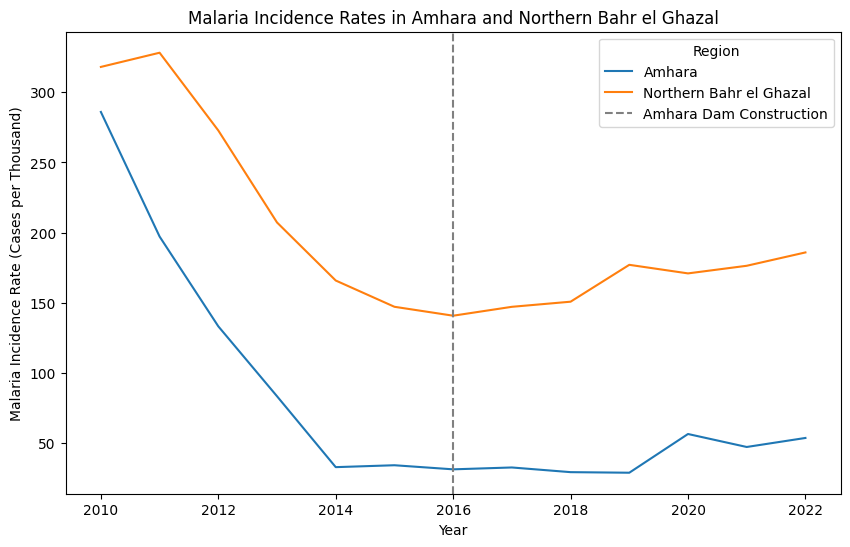

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/content/datagroup2.csv')

# 使用 seaborn 绘制折线图
plt.figure(figsize=(10, 6))  # 设置图形大小
sns.lineplot(x='Year', y='Value', hue='Name', data=data)
plt.title('Malaria Incidence Rates in Amhara and Northern Bahr el Ghazal')  # 设置标题
plt.xlabel('Year')  # 设置 x 轴标签
plt.ylabel('Malaria Incidence Rate (Cases per Thousand)')  # 设置 y 轴标签
plt.axvline(2016, color='gray', linestyle='--', label='Amhara Dam Construction')
plt.legend(title='Region')  # 显示图例
plt.savefig('linechart40392.png')
plt.show()  # 显示图形

In [7]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

# 读取数据
df_s = pd.read_csv('/content/datagroup2.csv')

# 将 'year' 列转换为日期时间格式
df_s['date'] = pd.to_datetime(df_s['Year'], format='%Y')

models = []
names = []

for window in range(1, 6):
    did = df_s[(df_s['date'] >= pd.to_datetime(str(2016 - window) + '-01-01')) & (df_s['date'] <= pd.to_datetime(str(2016 + window) + '-01-01')) & df_s['Name'].isin(['Amhara', 'Northern Bahr el Ghazal'])]
    did['post'] = np.where(did['date'] >= pd.to_datetime('2016-01-01'), 1, 0)
    did['treatment'] = np.where(did['Name'] == 'Amhara', 1, 0)  # 将 'Anseba' 设置为处理组
    did['post_treatment'] = did['post'] * did['treatment']
    did_model = ols('Value ~  post + treatment + post_treatment', did).fit()  # 使用 'incidence' 作为结果变量
    models.append(did_model)
    names.append('± ' + str(window) + ' Year')

table = summary_col(
    models,
    stars=True,
    float_format='%0.3f',
    model_names=names,
    info_dict={"N": lambda x: "{0:d}".format(int(x.nobs))}
)

print(table)


                 ± 1 Year    ± 2 Year    ± 3 Year    ± 4 Year    ± 5 Year 
--------------------------------------------------------------------------
Intercept      147.192***  156.550***  173.457***  198.296***  224.281*** 
               (3.235)     (4.404)     (11.999)    (17.761)    (22.195)   
post           -3.188      -10.276     -19.479     -40.917     -63.730**  
               (3.961)     (5.685)     (15.873)    (23.829)    (30.052)   
treatment      -112.906*** -122.942*** -123.237*** -127.315*** -128.049***
               (4.574)     (6.228)     (16.969)    (25.118)    (31.388)   
post_treatment 0.935       7.809       -0.146      5.721       5.202      
               (5.602)     (8.040)     (22.448)    (33.699)    (42.499)   
R-squared      0.999       0.993       0.927       0.811       0.706      
R-squared Adj. 0.997       0.990       0.905       0.771       0.657      
N              6           10          14          18          22         
Standard errors in paren

<ipython-input-7-921b2093e2e1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['post'] = np.where(did['date'] >= pd.to_datetime('2016-01-01'), 1, 0)
<ipython-input-7-921b2093e2e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['treatment'] = np.where(did['Name'] == 'Amhara', 1, 0)  # 将 'Anseba' 设置为处理组
<ipython-input-7-921b2093e2e1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [8]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Load your data (replace with your actual file path):
file_path = '/content/datagroup3.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)


# 2. Create treatment and post-treatment variables:
data['treatment_group'] = (data['Name'] == 'Tigray').astype(int) # 1 for Anseba, 0 for Gash Barka
data['post_treatment'] = (data['Year'] >= 2015).astype(int)  # 1 for years 2016 and later, 0 for before

# 3. Run the DiD regression:
model = smf.ols('Value ~ treatment_group * post_treatment', data=data).fit()

# 4. Print the results:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     16.42
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           7.95e-06
Time:                        12:04:27   Log-Likelihood:                -132.27
No. Observations:                  26   AIC:                             272.5
Df Residuals:                      22   BIC:                             277.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

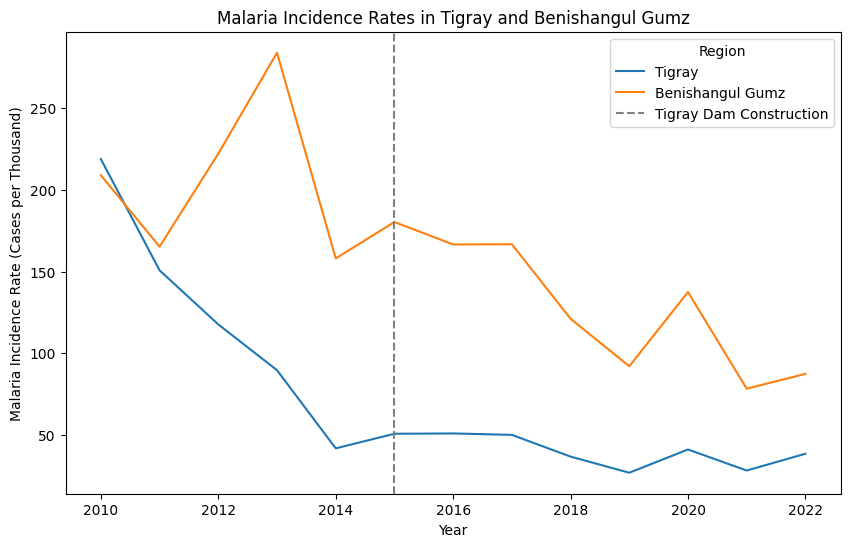

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/content/datagroup3.csv')

# 使用 seaborn 绘制折线图
plt.figure(figsize=(10, 6))  # 设置图形大小
sns.lineplot(x='Year', y='Value', hue='Name', data=data)
plt.title('Malaria Incidence Rates in Tigray and Benishangul Gumz')  # 设置标题
plt.xlabel('Year')  # 设置 x 轴标签
plt.ylabel('Malaria Incidence Rate (Cases per Thousand)')  # 设置 y 轴标签
plt.axvline(2015, color='gray', linestyle='--', label='Tigray Dam Construction')
plt.legend(title='Region')  # 显示图例

plt.show()  # 显示图形

In [10]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

# 读取数据
df_s = pd.read_csv('/content/datagroup3.csv')

# 将 'year' 列转换为日期时间格式
df_s['date'] = pd.to_datetime(df_s['Year'], format='%Y')

models = []
names = []

for window in range(1, 6):
    did = df_s[(df_s['date'] >= pd.to_datetime(str(2015 - window) + '-01-01')) & (df_s['date'] <= pd.to_datetime(str(2015 + window) + '-01-01')) & df_s['Name'].isin(['Tigray', 'Benishangul Gumz'])]
    did['post'] = np.where(did['date'] >= pd.to_datetime('2016-01-01'), 1, 0)
    did['treatment'] = np.where(did['Name'] == 'Tigray', 1, 0)  # 将 'Anseba' 设置为处理组
    did['post_treatment'] = did['post'] * did['treatment']
    did_model = ols('Value ~  post + treatment + post_treatment', did).fit()  # 使用 'incidence' 作为结果变量
    models.append(did_model)
    names.append('± ' + str(window) + ' Year')

table = summary_col(
    models,
    stars=True,
    float_format='%0.3f',
    model_names=names,
    info_dict={"N": lambda x: "{0:d}".format(int(x.nobs))}
)

print(table)


                 ± 1 Year    ± 2 Year    ± 3 Year    ± 4 Year   ± 5 Year 
-------------------------------------------------------------------------
Intercept      169.241***  207.511***  211.197***  202.018***  203.179***
               (8.483)     (23.956)    (18.998)    (18.378)    (18.636)  
post           -2.616      -40.816     -59.692*    -65.371**   -66.363** 
               (14.692)    (37.879)    (29.021)    (27.567)    (27.641)  
treatment      -122.984*** -146.795*** -136.240*** -111.897*** -91.592***
               (11.996)    (33.880)    (26.868)    (25.990)    (26.355)  
post_treatment 7.271       30.574      30.625      16.383      -4.101    
               (20.778)    (53.568)    (41.041)    (38.985)    (39.090)  
R-squared      0.987       0.821       0.808       0.730       0.662     
R-squared Adj. 0.967       0.732       0.750       0.673       0.606     
N              6           10          14          18          22        
Standard errors in parentheses.
* p<.

<ipython-input-10-39bcb29d5079>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['post'] = np.where(did['date'] >= pd.to_datetime('2016-01-01'), 1, 0)
<ipython-input-10-39bcb29d5079>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['treatment'] = np.where(did['Name'] == 'Tigray', 1, 0)  # 将 'Anseba' 设置为处理组
<ipython-input-10-39bcb29d5079>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.902
Model:                            WLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     27.76
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           7.01e-05
Time:                        14:38:53   Log-Likelihood:                -55.483
No. Observations:                  13   AIC:                             119.0
Df Residuals:                       9   BIC:                             121.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         19.3463     14.143      1.

<ipython-input-11-92dc6b024437>:38: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 3
  ax.legend(handles=handles, labels=labels, loc='best')  # 使用 loc='best' 自动选择最佳位置


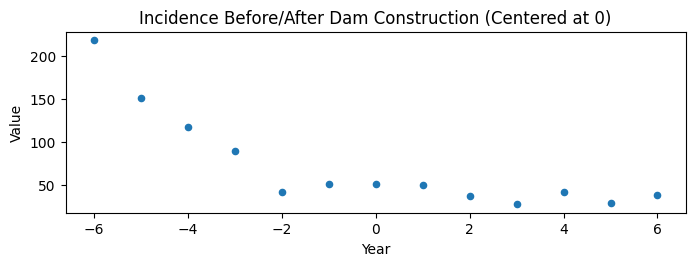

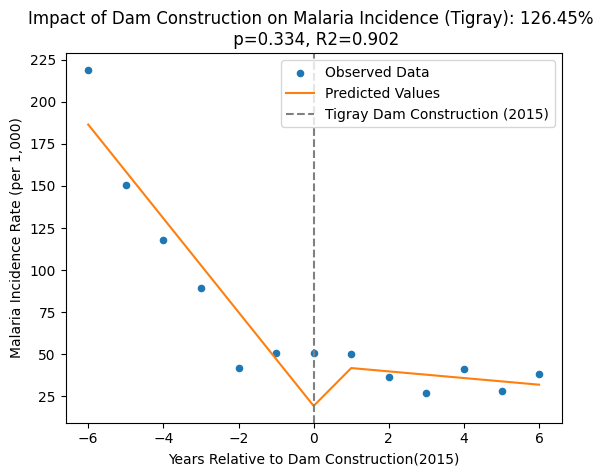

In [11]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/datagroup3.csv")
df["Year"] -= 2016
#year dam was constructed

#PART 2
plt.figure(figsize=(8, 8))
ax = plt.subplot(3,1,1)
Mpumalanga_df = df[df['Name'] == 'Tigray'] #change this to your second sub-national unit
Mpumalanga_df.plot.scatter(x="Year", y="Value", ax=ax)
plt.title("Incidence Before/After Dam Construction (Centered at 0)")

#PART 3
import statsmodels.formula.api as smf

rdd_df = Mpumalanga_df.assign(threshold=(Mpumalanga_df["Year"] > 0).astype(int))
model1 = smf.wls("Value ~ Year * threshold ", rdd_df).fit()
print(model1.summary())

#PART 4
ate_pct = 100*((model1.params["threshold"] + model1.params["Intercept"])/model1.params["Intercept"] - 1)
print("Dam construction increases the malaria incidence rate by {}%".format(np.round(ate_pct,2)))

#PART 5
ax = Mpumalanga_df.plot.scatter(x="Year", y="Value", color="C0",label="Observed Data")
Mpumalanga_df.assign(predictions=model1.fittedvalues).plot(x="Year", y="predictions", ax=ax, color="C1",label="Predicted Values")

plt.title(f"Impact of Dam Construction on Malaria Incidence (Tigray): {np.round(ate_pct, 2)}% \n p={np.round(model1.pvalues['threshold'], 3)}, R2={np.round(model1.rsquared, 3)}")
plt.ylabel('Malaria Incidence Rate (per 1,000)')
plt.xlabel("Years Relative to Dam Construction(2015)")
dam_line = plt.axvline(x=0, color='gray', linestyle='--', label="Tigray Dam Construction (2015)")
handles, labels = ax.get_legend_handles_labels()
handles.append(dam_line)
ax.legend(handles=handles, labels=labels, loc='best')  # 使用 loc='best' 自动选择最佳位置

plt.savefig('/content/RDDline40394Tigray.png')
plt.show()